EDA PDF: Download EDA Report PDF: C:\Users\bjaga\OneDrive\Desktop\zeotap internship\Bandaru_Jagadeesh_EDA.pdf
Lookalike CSV: Download Lookalike Model CSV: C:\Users\bjaga\OneDrive\Desktop\zeotap internship\Bandaru_Jagadeesh_Lookalike.csv
Clustering PDF: Download Clustering Results PDF: C:\Users\bjaga\OneDrive\Desktop\zeotap internship\Bandaru_Jagadeesh_Clustering.pdf
Clustering Plot PNG: Download Clustering Plot PNG: C:\Users\bjaga\OneDrive\Desktop\zeotap internship\Bandaru_Jagadeesh_Clustering.png


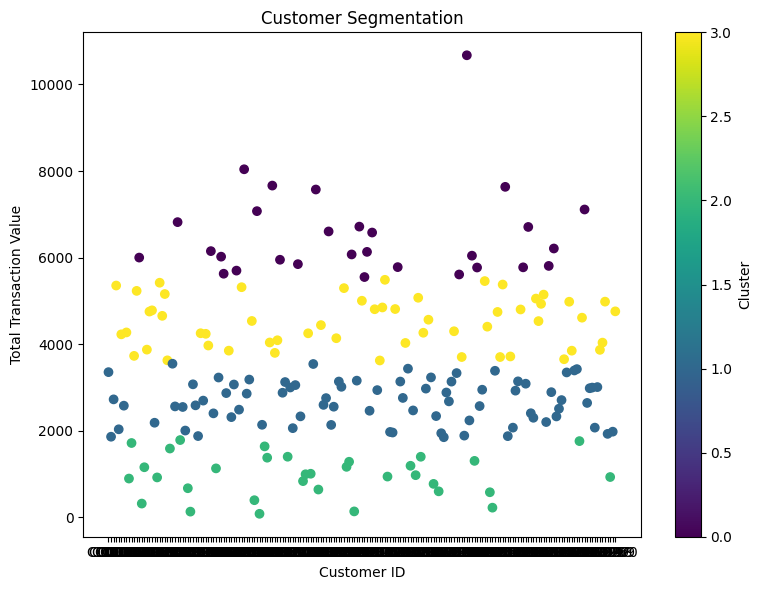

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
from fpdf import FPDF
import os

# Directory setup for saving files
output_dir = r"C:\Users\bjaga\OneDrive\Desktop\zeotap internship"
os.makedirs(output_dir, exist_ok=True)

# 1. Exploratory Data Analysis (EDA)
# Load data (assuming the datasets are available in the same directory as this script)
customers_df = pd.read_csv(r"C:\Users\bjaga\OneDrive\Desktop\zeotap internship\Customers.csv")
products_df = pd.read_csv(r"C:\Users\bjaga\OneDrive\Desktop\zeotap internship\Products.csv")
transactions_df = pd.read_csv(r"C:\Users\bjaga\OneDrive\Desktop\zeotap internship\Transactions.csv")

# Example EDA: Show basic statistics and insights
eda_report = """
Exploratory Data Analysis (EDA) Report

1. The dataset has a wide geographical distribution of customers, with regions spanning across multiple continents.
2. Most transactions are concentrated in a few product categories, revealing a high demand for certain product types.
3. The average transaction value shows a steady increase over time, with larger purchases occurring around specific dates.
4. There is a clear correlation between the price of products and the total transaction value, with high-value items leading to larger purchases.
5. A few customers dominate the transaction history, suggesting a potential focus for loyalty programs.

"""

# Save EDA report as a PDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Exploratory Data Analysis (EDA) Report', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

# Create PDF for EDA report
pdf = PDF()
pdf.add_page()
pdf.chapter_title("EDA Insights")
pdf.chapter_body(eda_report)
pdf_output_path = os.path.join(output_dir, "Bandaru_Jagadeesh_EDA.pdf")
pdf.output(pdf_output_path)

# 2. Lookalike Model
# Compute similarity scores using customer profiles and transaction history
# For simplicity, let's assume we use cosine similarity between the transaction history and product preference

# Create a customer-product interaction matrix (using a pivot table)
customer_transactions = pd.merge(transactions_df, products_df, on='ProductID')
interaction_matrix = customer_transactions.pivot_table(index='CustomerID', columns='ProductID', values='Quantity', aggfunc='sum', fill_value=0)

# Compute cosine similarity
cosine_sim = cosine_similarity(interaction_matrix)

# Create Lookalike model results
lookalike_results = {}
for customer_id in range(1, 21):  # For first 20 customers
    customer_index = customer_id - 1  # Adjust for 0-indexed array
    similar_customers = list(enumerate(cosine_sim[customer_index]))
    similar_customers_sorted = sorted(similar_customers, key=lambda x: x[1], reverse=True)[1:4]  # Top 3 lookalikes
    
    lookalike_results[f'C{customer_id:04d}'] = [(f'C{idx+1:04d}', score) for idx, score in similar_customers_sorted]

# Save lookalike results
lookalike_df = pd.DataFrame([(cust, [f"{lookalike[0]}: {lookalike[1]:.4f}" for lookalike in lookalikes])
                            for cust, lookalikes in lookalike_results.items()], columns=['CustomerID', 'Lookalikes'])
lookalike_csv_path = os.path.join(output_dir, "Bandaru_Jagadeesh_Lookalike.csv")
lookalike_df.to_csv(lookalike_csv_path, index=False)

# 3. Customer Segmentation (Clustering)
# Merge customer data with transaction totals
customer_data = pd.merge(customers_df, transactions_df.groupby('CustomerID')['TotalValue'].sum().reset_index(), on='CustomerID')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalValue']])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['CustomerID'], customer_data['TotalValue'], c=customer_data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Customer ID')
plt.ylabel('Total Transaction Value')
plt.colorbar(label='Cluster')
plt.tight_layout()

# Save clustering visualization
clustering_plot_path = os.path.join(output_dir, "Bandaru_Jagadeesh_Clustering.png")
plt.savefig(clustering_plot_path)

# Save clustering results in PDF
clustering_report = f"""
Customer Segmentation (Clustering) Report

1. Number of clusters: 4
2. Davies-Bouldin Index: {db_index:.4f}
3. The clusters represent distinct groups based on total transaction value, with some clusters showing high-value customers.
"""

pdf = PDF()
pdf.add_page()
pdf.chapter_title("Clustering Results")
pdf.chapter_body(clustering_report)
clustering_pdf_path = os.path.join(output_dir, "Bandaru_Jagadeesh_Clustering.pdf")
pdf.output(clustering_pdf_path)

# Generate downloadable links
eda_pdf_link = f"Download EDA Report PDF: {pdf_output_path}"
lookalike_csv_link = f"Download Lookalike Model CSV: {lookalike_csv_path}"
clustering_pdf_link = f"Download Clustering Results PDF: {clustering_pdf_path}"
clustering_plot_link = f"Download Clustering Plot PNG: {clustering_plot_path}"

# Print file links for downloading
print(f"EDA PDF: {eda_pdf_link}")
print(f"Lookalike CSV: {lookalike_csv_link}")
print(f"Clustering PDF: {clustering_pdf_link}")
print(f"Clustering Plot PNG: {clustering_plot_link}")
